In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
list_of_tickers = ["MJ", 'SPY',]
end_date= datetime.now()
start_date= end_date + timedelta(-730)
tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close' )
tickers_df.head()

MJ                                 SPY                          \
             open   high    low  close volume    open    high     low   close   
date                                                                            
2017-09-19  32.24  32.24  32.24  32.24    219  250.00  250.07  249.60  249.97   
2017-09-20  32.25  32.69  32.25  32.57   1019  250.07  250.19  248.92  250.06   
2017-09-21  32.33  32.46  32.33  32.36    676  249.88  249.98  249.19  249.39   
2017-09-22  32.00  32.50  32.00  32.42    633  249.05  249.63  249.02  249.44   
2017-09-25  32.00  32.00  31.76  32.00   1229  249.15  249.55  248.08  248.93   

                      
              volume  
date                  
2017-09-19  47108148  
2017-09-20  59574083  
2017-09-21  48211398  
2017-09-22  51214032  
2017-09-25  57064357

In [3]:
tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
tickers_df.head()

,MJ,SPY
,close,close
date,,
2017-09-19,32.24,249.97
2017-09-20,32.57,250.06
2017-09-21,32.36,249.39
2017-09-22,32.42,249.44
2017-09-25,32.00,248.93


In [9]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = tickers_df.pct_change().dropna()
df_daily_returns.head()

,MJ,SPY
,close,close
date,,
2017-09-20,0.010236,0.000360
2017-09-21,-0.006448,-0.002679
2017-09-22,0.001854,0.000200
2017-09-25,-0.012955,-0.002045
2017-09-26,0.000000,0.000603


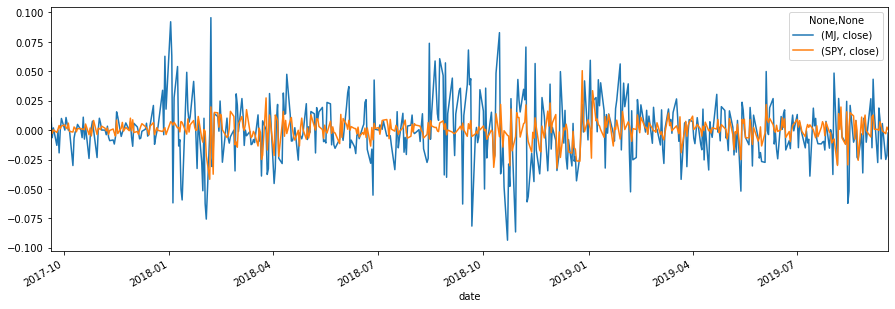

In [10]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(15,5));

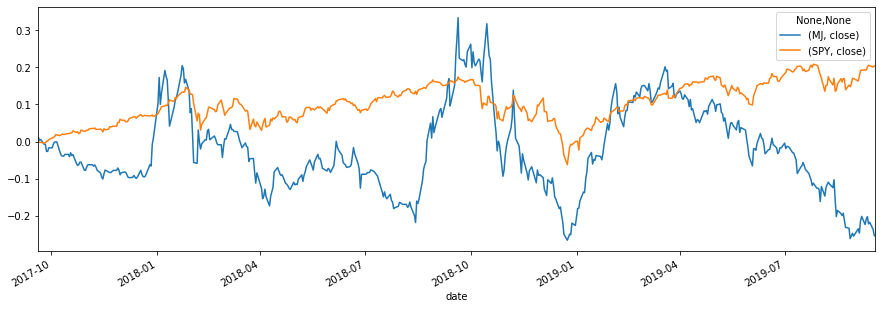

In [11]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(15,5));


In [13]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

MJ   close    0.116536
SPY  close    0.053115
dtype: float64